In [16]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import scipy
import warnings
import matplotlib_inline
import sys

In [17]:
#load files from different directories
sys.path.insert(1, '../src/')
from config import TEST_DATA , TRAIN_DATA , CUSTOMER_DEMOGRAPHICS_DATA , COUPON_ITEM_DATA , CAMPAIGN_DATA , CUSTOMER_TRANSACTION_DATA ,ITEM_DATA

In [18]:
#import all csv files
def importCSV(path):
    """Import csv function 

    Args:
        path ([str]): name of the csv file with regard to DATAPATH

    Returns:
        [Pandas dataframe]
    """
    return pd.read_csv(path)

In [19]:
#import train and test csv files
train_df=importCSV(TRAIN_DATA)
test_df=importCSV(TEST_DATA)

#import other data 
campaign_df=importCSV(CAMPAIGN_DATA)
coupon_item_mapping_df=importCSV(COUPON_ITEM_DATA)
customer_demographics_df=importCSV(CUSTOMER_DEMOGRAPHICS_DATA)
customer_transaction_data_df=importCSV(CUSTOMER_TRANSACTION_DATA)
item_data_df=importCSV(ITEM_DATA)

In [5]:
#lets take a look at test file
test_df.head(2)

,id,campaign_id,coupon_id,customer_id
0,77211,2,1023,633
1,90977,12,1075,1167


In [27]:
rows,cols=train_df.shape
print(f'The rows are {rows} and cols are {cols}')


The rows are 54858 and cols are 5


In [48]:
print(f'the total entries are {len(train_df)} and total unique coupon id are {len(train_df.coupon_id.unique())} \
        total unique customer are {len(train_df.customer_id.unique())}')

the total entries are 54858 and total unique coupon id are 866         total unique customer are 1428


In [35]:
#campaign 
campaign_df.head(2)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13


In [22]:
# camapign id for 14,15,16 not here.
len(campaign_df)

28

In [7]:
coupon_item_mapping_df.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [8]:
customer_demographics_df.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [ ]:
cus

In [17]:
customer_transaction_data_df.tail()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0
1324565,2013-06-30,1129,64498,2,489.78,0.00,0.0


In [12]:
item_data_df.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [34]:
item_data_df['category'].unique()
item_data_df.groupby([  "category",
                        "brand_type"
                     ])['brand_type'].count()

category                brand_type 
Alcohol                 Established      303
Bakery                  Established     1066
                        Local            613
Dairy, Juices & Snacks  Established     2283
                        Local            142
Flowers & Plants        Established      652
                        Local             12
Fuel                    Local             14
Garden                  Established      101
                        Local              1
Grocery                 Established    25226
                        Local           7222
Meat                    Established     2035
                        Local             45
Miscellaneous           Established      353
                        Local             32
Natural Products        Established     2345
                        Local            188
Packaged Meat           Established     1631
                        Local            335
Pharmaceutical          Established    22482
                   

In [ ]:
#using groupby make differnt assumption


<AxesSubplot:title={'center':'Category'}>

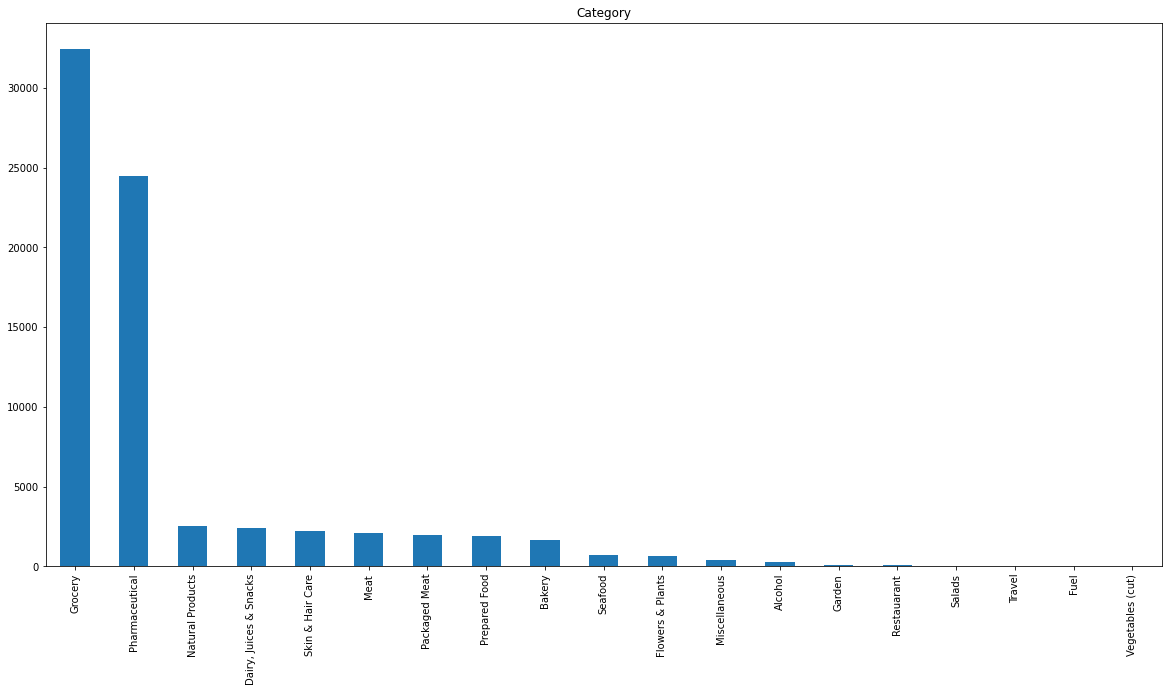

In [35]:
#lets see the different categories with count 
item_data_df['category'].value_counts().plot.bar(figsize=(20,10), title='Category')

In [37]:
train_df=train_df.drop(['id'],axis=1)

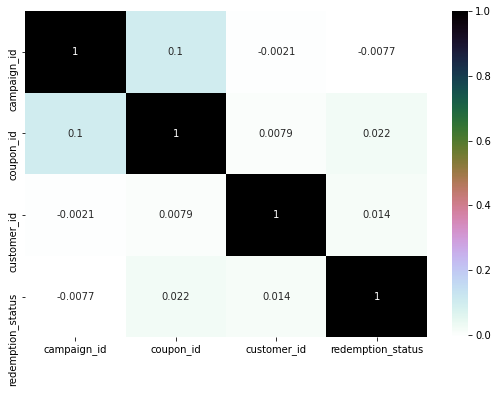

In [38]:
#heatmap to see the correlation
plt.figure(figsize=(9,6)) 
sns.heatmap(train_df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

<img src="https://s3.amazonaws.com/thinkific/file_uploads/118220/images/4a8/08f/c76/1549257180501.jpg">

In [ ]:
#demographic 

In [39]:
customer_demographics_df.head(2)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5


In [40]:
train_df.head()

,campaign_id,coupon_id,customer_id,redemption_status
0,8,725,45,0
1,29,265,334,0
2,13,281,408,0
3,13,625,577,0
4,13,480,414,0


<AxesSubplot:title={'center':'Coupon_Status'}>

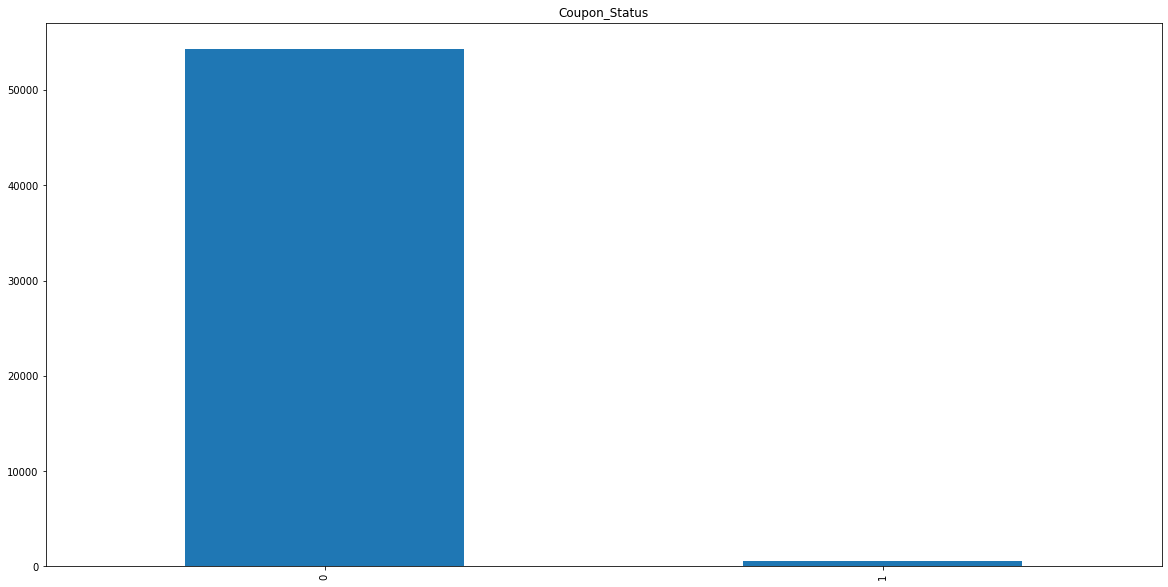

In [41]:
#lets get a check how highly is the data skewed.
train_df['redemption_status'].value_counts().plot.bar(figsize=(20,10), title='Coupon_Status')

In [45]:
#lets see actually how many are 1. In our case, so its 518 coupon was redeemed
train_df_1=train_df[train_df['redemption_status']==1]

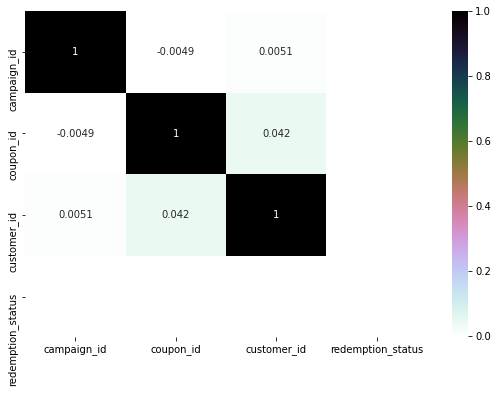

In [46]:
#lets see the same correlation with only 1 redemption status 
plt.figure(figsize=(9,6)) 
sns.heatmap(train_df_1.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [79]:
demo_train_df=pd.concat([customer_demographics_df,train_df],axis=1)

In [80]:
demo_train_df.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_id,coupon_id,customer_id,redemption_status
0,1.0,70+,Married,0.0,2,NaN,4.0,8,725,45,0
1,6.0,46-55,Married,0.0,2,NaN,5.0,29,265,334,0
2,7.0,26-35,NaN,0.0,3,1,3.0,13,281,408,0
3,8.0,26-35,NaN,0.0,4,2,6.0,13,625,577,0
4,10.0,46-55,Single,0.0,1,NaN,5.0,13,480,414,0


In [70]:
demo_train_df.age_range.value_counts()

46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: age_range, dtype: int64

In [81]:
agemapping={'46-55':'uppermidAge',
            '36-45':'midage',
            '26-35':'averageage',
            '70+':'superold',
            '56-70':'old',
            '18-25':'youngage'}

In [72]:
#let map redemption status column 
mapping={0:'NO',1:'YES'}
demo_train_df.loc[:,'redemption_status']=demo_train_df.redemption_status.map(mapping)


In [73]:
demo_train_df

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_id,coupon_id,customer_id,redemption_status
0,1.0,70+,Married,0.0,2,NaN,4.0,8,725,45,NO
1,6.0,46-55,Married,0.0,2,NaN,5.0,29,265,334,NO
2,7.0,26-35,NaN,0.0,3,1,3.0,13,281,408,NO
3,8.0,26-35,NaN,0.0,4,2,6.0,13,625,577,NO
4,10.0,46-55,Single,0.0,1,NaN,5.0,13,480,414,NO
...,...,...,...,...,...,...,...,...,...,...,...
54853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,18,690,NO
54854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,561,705,NO
54855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,277,103,NO
54856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,916,184,NO


In [82]:
demo_train_df['age_range']=demo_train_df.age_range.astype('str')

In [76]:
demo_train_df

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_id,coupon_id,customer_id,redemption_status
0,1.0,70+,Married,0.0,2,NaN,4.0,8,725,45,NO
1,6.0,46-55,Married,0.0,2,NaN,5.0,29,265,334,NO
2,7.0,26-35,NaN,0.0,3,1,3.0,13,281,408,NO
3,8.0,26-35,NaN,0.0,4,2,6.0,13,625,577,NO
4,10.0,46-55,Single,0.0,1,NaN,5.0,13,480,414,NO
...,...,...,...,...,...,...,...,...,...,...,...
54853,NaN,nan,NaN,NaN,NaN,NaN,NaN,9,18,690,NO
54854,NaN,nan,NaN,NaN,NaN,NaN,NaN,13,561,705,NO
54855,NaN,nan,NaN,NaN,NaN,NaN,NaN,13,277,103,NO
54856,NaN,nan,NaN,NaN,NaN,NaN,NaN,8,916,184,NO


In [83]:
demo_train_df.loc[:,'age_range']=demo_train_df.age_range.map(agemapping)

In [84]:
demo_train_df

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_id,coupon_id,customer_id,redemption_status
0,1.0,superold,Married,0.0,2,NaN,4.0,8,725,45,0
1,6.0,uppermidAge,Married,0.0,2,NaN,5.0,29,265,334,0
2,7.0,averageage,NaN,0.0,3,1,3.0,13,281,408,0
3,8.0,averageage,NaN,0.0,4,2,6.0,13,625,577,0
4,10.0,uppermidAge,Single,0.0,1,NaN,5.0,13,480,414,0
...,...,...,...,...,...,...,...,...,...,...,...
54853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,18,690,0
54854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,561,705,0
54855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,277,103,0
54856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,916,184,0


<AxesSubplot:xlabel='age_range'>

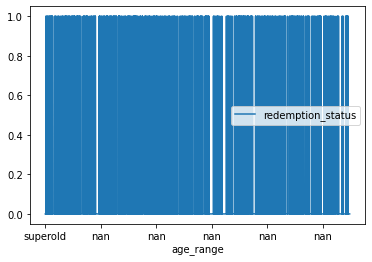

In [86]:
demo_train_df.plot(x='age_range',y='redemption_status')

In [88]:
demo_train_df[demo_train_df['age_range']=='superold' and demo_train_df['redemption_status']==1] 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().